# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [95]:

df = pd.read_csv(r'C:\Users\mareg\OneDrive\Documentos\TheBridge_Enero\Machine_Learning\2-No_Supervisado\1-PCA\Practica\data\comprar_alquilar.csv') 
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [96]:
df.shape

(202, 10)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

In [98]:
column_names = df.columns.tolist()
print(column_names)

['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros', 'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar']


C:\Users\mareg\AppData\Local\Temp\ipykernel_16120\3413821802.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, bins=10)  # Puedes ajustar el número de bins según tu preferencia


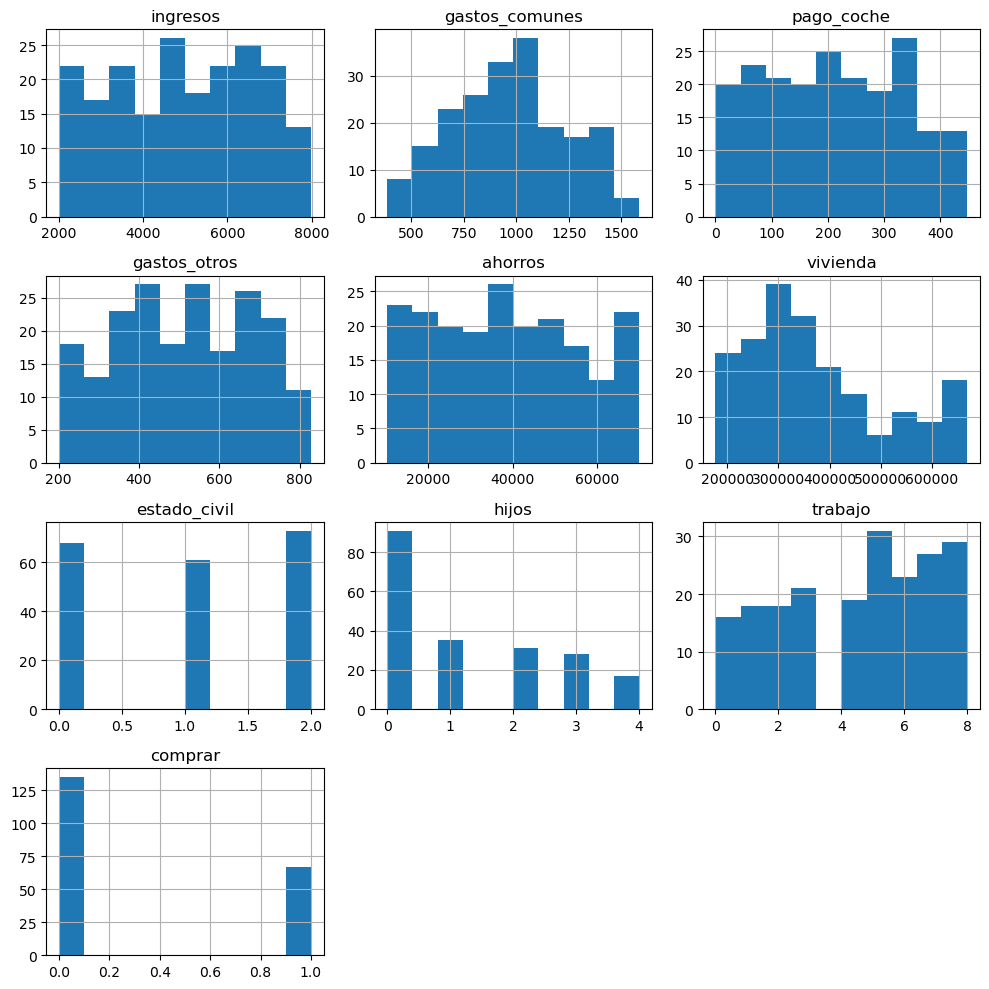

In [99]:
# Crear una figura con tamaño personalizado
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar las columnas en histogramas
df.hist(ax=ax, bins=10)  # Puedes ajustar el número de bins según tu preferencia

# Personalizar los ejes y etiquetas
ax.set_xlabel('Valor')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Variables')

# Mostrar los histogramas
plt.tight_layout()
plt.show()

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [101]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#normalizamos
scaler=StandardScaler()
df = df.drop(['comprar'], axis=1) 
scaler.fit(df) 
X_scaled=scaler.transform(df)#escalar los datos y normalizar



## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [102]:

pca=PCA(n_components=9) 
pca.fit(X_scaled)  #componentes principales
X_pca=pca.transform(X_scaled) # convertir los datos con las nuevas dimensiones de PCA

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [ ]:
pca.explained_variance_ratio_
pca.components_

In [103]:

var_expl = pca.explained_variance_ratio_
print(var_expl)
explained_variance_ratio_cumulative = np.cumsum(var_expl)
print(explained_variance_ratio_cumulative)
print('suma:',sum(expl[0:5])) # 5 componentes explican 85% de varianza 

[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
[0.29913557 0.5320848  0.64919721 0.75605343 0.85240621 0.90870487
 0.95016066 0.98033885 1.        ]
suma: 0.8524062117714308


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

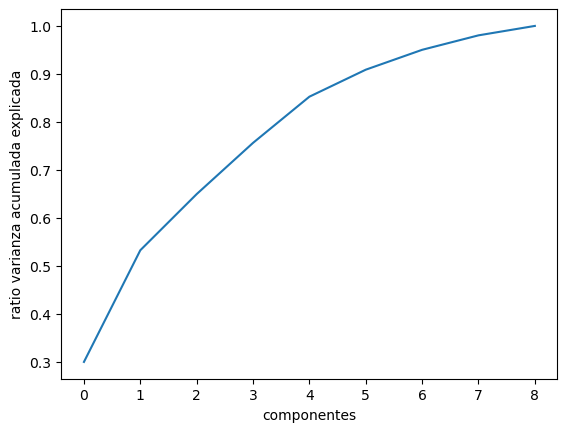

In [104]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('componentes')
plt.ylabel('ratio varianza acumulada explicada')
plt.show()
 

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

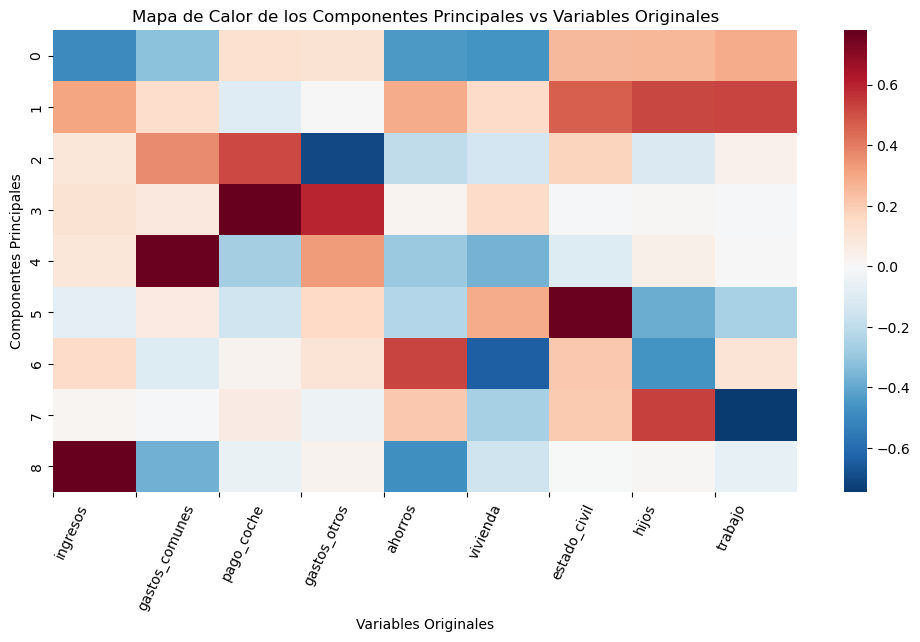

In [105]:
# Obtener los componentes principales del PCA
components = pca.components_

# Crear un mapa de calor de los componentes principales
plt.figure(figsize=(12, 6))
sns.heatmap(components, cmap='RdBu_r', center=0)
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
plt.xlabel('Variables Originales')
plt.ylabel('Componentes Principales')
plt.title('Mapa de Calor de los Componentes Principales vs Variables Originales')
plt.show()

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - KNN con 3 vecinos
3. Entrena
4. Predice en test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?
8. Guarda tu modelo

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
from sklearn.pipeline import make_pipeline

In [90]:

# Paso 1: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Crear el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # Escalador de características
    ('pca', PCA(n_components=5)),        # PCA con 5 componentes
    ('knn', KNeighborsClassifier(n_neighbors=3))   # KNN con 3 vecinos
])

# Paso 3: Ajustar el pipeline en los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Paso 4: Realizar predicciones en los datos de prueba
y_pred = pipeline.predict(X_test)

In [111]:
# Split dataset in training and test datasets

#X = df.drop('comprar',1)
#y = df['comprar']

X_train, X_test = train_test_split(X,y, test_size=0.2, random_state=42) 
y_train =X_train["comprar"]
y_test = X_test["comprar"]
X_train = X_train.drop(['comprar'], axis=1)
X_test = X_test.drop(['comprar'], axis=1)

ValueError: too many values to unpack (expected 2)

In [ ]:
X = df.drop('comprar',1)
y = df['comprar']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [1]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'confusion_matrix' is not defined

Guarda el modelo

In [ ]:
import pickle
